Copyright (c) 2017,2018, Johannes Schöneberg. All rights reserved.
The default copyright laws apply.

In [33]:
import csv


#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims

import scipy


import math

from scipy import optimize

import scipy.ndimage

#own modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/JohSchoeneberg/Confleezers/confleezers_data_analysis/"
sys.path.append(pythonPackagePath+"/modules")
import InputProcessing as inproc
import ForceFileProcessing as ffp
import TubeProcessing as tubeProc

In [34]:
# read input parameters:
path = '/Volumes/Samsung_T3b/science/confleezers/2018-06-12/v6/'

inputParameters = pd.read_csv(path+'_info.csv',names=['key','value'])
inputParameters[0:5]

,key,value
0,key,value
1,key,value
2,key,value
3,key,value
4,key,rocknroll


In [35]:
# read the movie frames

#frames_ch0 = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch0_avg20_zoomVesicle.tif') 

inputDataFolder = inproc.getInputParameter(inputParameters,"input_data_folder")
outputDataFolder = inproc.getInputParameter(inputParameters,"output_data_folder")
movie_zoomVesicle_ch0 = "movie_ch0_avg20_bleachCorrected.tif"

#df_tubeFluorescence = pd.read_csv(path+outputDataFolder+movie_zoomVesicle_ch0+'__gaussFitAlongTube_medianFilter60.csv')
df_tubeFluorescence = pd.read_csv(path+outputDataFolder+'movie_ch0_avg20_bleachCorrected.tif__gaussFitAlongTube_medianFilter60.csv')

df_tubeFluorescence[0:5]


,Unnamed: 0,fluorescenceIntensityTube[AU],time[s]
0,0,296.520762,-63.000
1,1,296.520762,-62.667
2,2,296.520762,-62.334
3,3,296.520762,-62.001
4,4,296.520762,-61.668


In [36]:
def calculateTubeRadius(I_tube,I_vesicle):
    prefactorForTubeRadius = 161 #nm
    interceptForTubeRadius = 4.4
#    prefactorForTubeRadius = 156.9 #161 #nm
#    interceptForTubeRadius = 10.6 #4.4
    print(I_tube/I_vesicle)
    return interceptForTubeRadius + prefactorForTubeRadius * I_tube/I_vesicle

# calculate the radius from the tube intensity 

[ 0.24556585  0.24556585  0.24556585 ...,  0.01041438  0.0123768   0.0123768 ]
[ 0.24556585  0.24556585  0.24556585 ...,  0.01041438  0.0123768   0.0123768 ]


Text(0.5,0,'time [frames]')

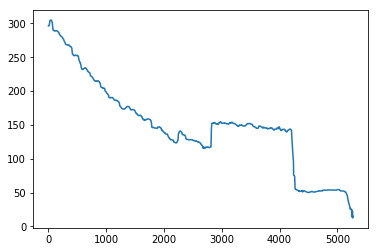

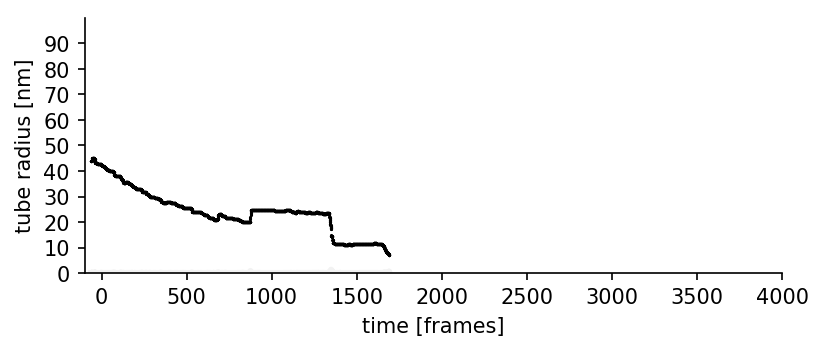

In [37]:
I_tube_exp = df_tubeFluorescence['fluorescenceIntensityTube[AU]'].values;

plt.plot(I_tube_exp)
# get the vesicle intensity by drawing a line accross the vesicle at different time 
# points and reading off the peak intensity
I_vesicle_exp = np.average([1424, 1269, 1357, 1099,1082,1014]);
#print("I_tube_exp",I_tube_exp,"I_vesicle_exp",I_vesicle_exp)



######


deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
# we have a shift in time since the movie got cut out
# 

time = deltaT + np.arange(0,len(I_tube_exp))*frameRate


plt.figure(dpi=150)
plt.gca().set_aspect(15)
#
tubeRadius_raw = np.round(calculateTubeRadius(I_tube_exp,I_vesicle_exp),decimals=2);

#generic standard deviation filter on a window
from scipy.ndimage.filters import generic_filter
movingStandardDeviation_tubeRadius = generic_filter(tubeRadius_raw, np.std, size=5)
plt.plot(time,movingStandardDeviation_tubeRadius,lw=3,c='grey',alpha=0.1);




#####



tubeRadius_raw = np.round(calculateTubeRadius(I_tube_exp,I_vesicle_exp),decimals=2);
tubeRadius = tubeRadius_raw
#tubeRadius[tubeRadius > 20] = np.nan
#tubeRadius[tubeRadius < 4] = np.nan
#print("tubeRadius: {}nm".format(tubeRadius))

plt.plot(time,scipy.ndimage.median_filter(tubeRadius,40),lw=0,c='k',marker='o',markersize=0.5);
plt.ylim(0,100)
plt.gca().set_yticks(range(0,100,10))

plt.xlim(-100,4000)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('tube radius [nm]')
plt.xlabel('time [frames]')



In [38]:
df = pd.DataFrame({'time': time, 'radius[nm]': scipy.ndimage.median_filter(tubeRadius,40)})
df = df[df['radius[nm]']>0]
outputpath = path+outputDataFolder+"tube_radius.csv"
print(outputpath)
df.to_csv(outputpath)
df[0:10]

/Volumes/Samsung_T3b/science/confleezers/2018-06-12/v6/./tube_radius.csv


,radius[nm],time
0,43.94,-63.000
1,43.94,-62.667
2,43.94,-62.334
3,43.94,-62.001
4,43.94,-61.668
5,43.94,-61.335
6,43.94,-61.002
7,43.94,-60.669
8,43.94,-60.336
9,43.94,-60.003
